<a href="https://colab.research.google.com/github/ViniciusKanh/Atv-DataMining-Unesp-Mestrado/blob/main/Atividade2_Leonardo_Vinicius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. Objetivos da Atividade 🎯

Os principais objetivos da **Atividade 2** são:

- Aplicar diferentes algoritmos de classificação (**Árvore de Decisão**, **Bagging**, **Boosting** e **Random Forest**).
- Comparar os resultados dos algoritmos utilizando técnicas de validação e medidas de desempenho, como **acurácia** e **F1-Score**.
- Transformar o problema multiclasse em problemas binários utilizando as abordagens **OVA (One-vs-All)** e **OVO (One-vs-One)**.
- Realizar o ajuste de hiperparâmetros para o algoritmo de melhor desempenho, verificando o impacto no resultado final.

## 2. Descrição do Dataset 📊

Para esta atividade, foi utilizado o dataset **"Estimation of Obesity Levels Based On Eating Habits and Physical Condition"**, que contém informações sobre os níveis de obesidade de indivíduos a partir de seus hábitos alimentares e condições físicas. Este conjunto de dados foi extraído de três países: **México**, **Peru** e **Colômbia**, e possui um total de **2111 instâncias** e **17 atributos**.

### 2.1. Características do Dataset

- **Tamanho do Dataset**: 2111 amostras.
- **Número de Atributos**: 16 características preditivas e 1 variável alvo (**NObeyesdad**, que representa o nível de obesidade).
- **Natureza das Variáveis**: As variáveis incluem tanto características **categóricas** (por exemplo, **Gênero**, **Histórico Familiar de Obesidade**) quanto **numéricas** (como **Idade**, **Peso**, **Altura**).

### 2.2. Classes Alvo 🔢

A variável alvo (**NObeyesdad**) é uma variável categórica que representa o nível de obesidade dos indivíduos e é composta pelas seguintes classes:

1. **Insufficient Weight**
2. **Normal Weight**
3. **Overweight Level I**
4. **Overweight Level II**
5. **Obesity Type I**
6. **Obesity Type II**
7. **Obesity Type III**

### 2.3. Aplicação Prática do Dataset

Este dataset é ideal para a tarefa de classificação multiclasse, onde buscamos estimar o nível de obesidade dos indivíduos com base em seus hábitos alimentares e físicos. A tarefa envolvida nesta atividade permite explorar diferentes abordagens de classificação e técnicas de transformação de problemas multiclasse em binários (OVA e OVO), o que é fundamental para a compreensão de como os algoritmos se comportam em diferentes cenários.

## 3. Conclusão 📌

A **Atividade 2** proporciona uma oportunidade valiosa de aplicar algoritmos de machine learning a um problema real, utilizando dados relacionados à saúde pública. O dataset escolhido oferece uma complexidade adequada para o estudo de algoritmos de classificação, especialmente em um contexto multiclasse, permitindo uma análise aprofundada do desempenho dos modelos e suas respectivas abordagens (OVA e OVO).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import LabelEncoder

##Carregar Conjunto de Dados

In [3]:
# Suponha que os dados estão em um arquivo CSV
data = pd.read_csv('/content/drive/MyDrive/Mestrado/Mineracao/Atividade 2/Base de dados/ObesityDataSet_raw_and_data_sinthetic.csv')



# Se houver necessidade, transformar as classes categóricas em numéricas
label_encoder = LabelEncoder()

# Identificar colunas categóricas
categorical_cols = data.select_dtypes(include=['object']).columns

# Aplicar o LabelEncoder a todas as colunas categóricas
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

print(data.info)
print(data.head(10))
print(data.dtypes)

X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

<bound method DataFrame.info of       Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1

##Separar dados para Treinamento e Teste

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##Aplicar Algoritmos e Avaliar

###Árvore de Decisão

In [5]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')


###Bagging

In [6]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
acc_bagging = accuracy_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')


###Boosting(AdaBoost)

In [7]:
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)
acc_adaboost = accuracy_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


###Random Forest

In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')


##Avaliação do melhor resultado

In [9]:
results = {
    'Árvore de Decisão': (acc_tree, f1_tree),
    'Bagging': (acc_bagging, f1_bagging),
    'AdaBoost': (acc_adaboost, f1_adaboost),
    'Random Forest': (acc_rf, f1_rf)
}

for model, scores in results.items():
    print(f"{model} -> Acurácia: {scores[0]:.4f}, F1: {scores[1]:.4f}")


Árvore de Decisão -> Acurácia: 0.9148, F1: 0.9145
Bagging -> Acurácia: 0.9432, F1: 0.9431
AdaBoost -> Acurácia: 0.9085, F1: 0.9079
Random Forest -> Acurácia: 0.9432, F1: 0.9437


##Ajuste de Hiperparâmetros no melhor modelo

O melhor modelo encontrado foi de Random Forest

In [10]:
# Ajuste de Hiperparâmetros na Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')

print(f"Melhor Random Forest -> Acurácia: {acc_best_rf:.4f}, F1: {f1_best_rf:.4f}")


Melhor Random Forest -> Acurácia: 0.9479, F1: 0.9484


##Abordagens OVA e OVO

### OVA (One-vs-One): Transforme o problema multiclasse em problemas binários usando a estratégia One-vs-All. Isso significa que, para cada classe, você vai treinar um classificador que separa essa classe de todas as outras.

In [11]:
ova_model = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ova_model.fit(X_train, y_train)
y_pred_ova = ova_model.predict(X_test)
acc_ova = accuracy_score(y_test, y_pred_ova)
f1_ova = f1_score(y_test, y_pred_ova, average='weighted')


###OVO (One-vs-One): Para a abordagem One-vs-One, você vai treinar um classificador para cada par de classes. Por exemplo, para três classes A, B, e C, você criará classificadores para A vs B, A vs C, e B vs C.

In [12]:
ovo_model = OneVsOneClassifier(DecisionTreeClassifier(random_state=42))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)
f1_ovo = f1_score(y_test, y_pred_ovo, average='weighted')


### Comparação das duas abordagens

In [13]:
print(f"OVA -> Acurácia: {acc_ova:.4f}, F1: {f1_ova:.4f}")
print(f"OVO -> Acurácia: {acc_ovo:.4f}, F1: {f1_ovo:.4f}")


OVA -> Acurácia: 0.8644, F1: 0.8688
OVO -> Acurácia: 0.9006, F1: 0.9006


# Análise de Resultados para OVA e OVO

## 1. Introdução

A seguir, são apresentados os resultados da aplicação das técnicas OVA (One-vs-All) e OVO (One-vs-One) utilizando um classificador de árvore de decisão. Para avaliar o desempenho dessas duas abordagens, foram utilizadas as métricas de **acurácia** e **F1-Score**.

## 2. Resultados Obtidos

- **OVA** (One-vs-All)  
  - Acurácia: **0.8644**  
  - F1-Score: **0.8688**

- **OVO** (One-vs-One)  
  - Acurácia: **0.9006**  
  - F1-Score: **0.9006**

## 3. Discussão dos Resultados

### 3.1. Desempenho da Abordagem OVA 🤔

Na abordagem **OVA (One-vs-All)**, o modelo de árvore de decisão obteve uma acurácia de **86.44%** e um F1-Score de **86.88%**. Embora seja um desempenho razoável, podemos observar que o modelo teve dificuldades em capturar com precisão as distinções entre todas as classes ao tratá-las de forma individual contra as demais. A técnica OVA tende a ser menos eficiente para problemas com muitas classes, pois o modelo precisa diferenciar uma classe contra todas as outras, o que pode gerar confusão entre classes próximas.

### 3.2. Desempenho da Abordagem OVO 💡

Por outro lado, a abordagem **OVO (One-vs-One)** apresentou uma **melhoria significativa** em ambas as métricas, com acurácia de **90.06%** e F1-Score de **90.06%**. Esse ganho de desempenho pode ser atribuído ao fato de que, no OVO, o modelo constrói classificadores para cada par de classes, resultando em uma maior capacidade de separar classes adjacentes de forma mais precisa. Isso reduz a confusão entre as classes e leva a um desempenho superior no conjunto de teste.

### 3.3. Comparação OVA vs OVO 🔄

Comparando as duas abordagens, a técnica **OVO** se mostrou superior tanto em termos de acurácia quanto de F1-Score. A abordagem **OVA** simplifica o problema, mas acaba perdendo eficiência na separação das classes. Já a abordagem **OVO**, embora mais complexa, consegue um desempenho **mais robusto**, especialmente em problemas multiclasse como este, onde as classes possuem características similares.

## 4. Conclusão ✅

Os resultados indicam que, para o dataset utilizado, a técnica **One-vs-One (OVO)** é a mais adequada, pois oferece melhor desempenho ao tratar as classes de forma mais detalhada, gerando menos confusão entre elas. Portanto, a abordagem OVO é a recomendada para este problema de classificação multiclasse.


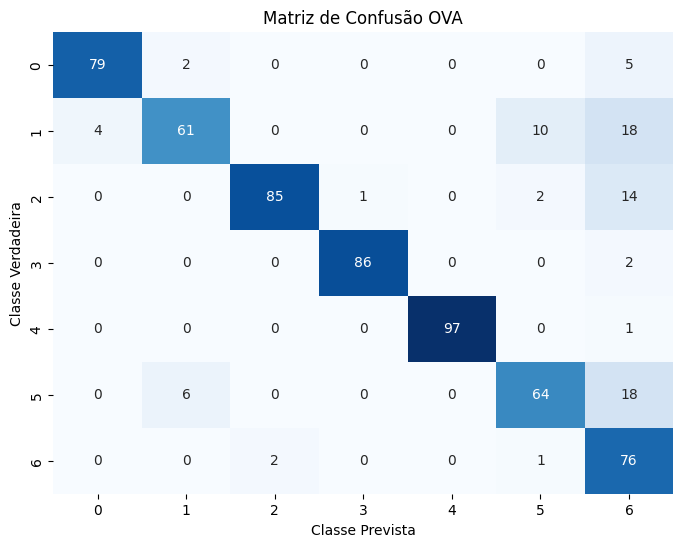

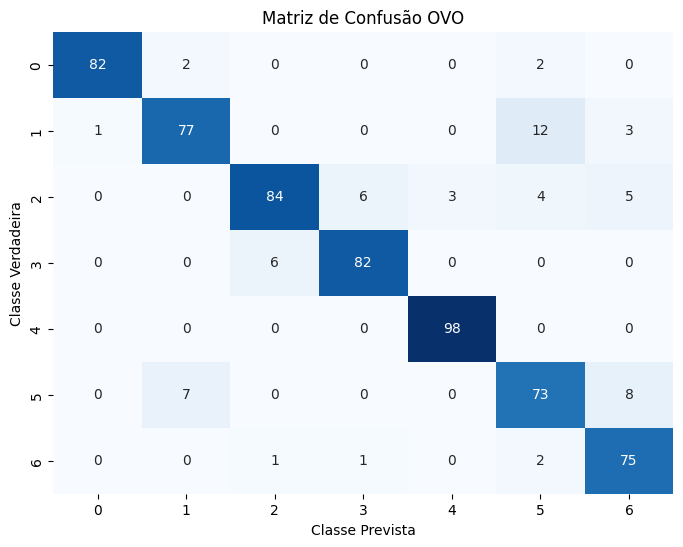

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusão para OVA
cm_ova = confusion_matrix(y_test, y_pred_ova)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ova, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão OVA')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.show()

# Matriz de confusão para OVO
cm_ovo = confusion_matrix(y_test, y_pred_ovo)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ovo, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão OVO')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.show()


# Análise das Matrizes de Confusão


As matrizes de confusão são uma excelente ferramenta para analisar o desempenho de um classificador, fornecendo uma visão detalhada das previsões corretas e incorretas. A seguir, são discutidas as matrizes de confusão geradas para as abordagens **OVA (One-vs-All)** e **OVO (One-vs-One)**.

## 1. Matriz de Confusão OVA 🤔

A matriz de confusão da abordagem **OVA** (One-vs-All) mostra que, embora o classificador tenha tido um desempenho geral satisfatório, existem algumas confusões notáveis entre as classes:

- A classe **1 (Normal Weight)** foi frequentemente confundida com as classes **5** e **6** (Obesity Type II e III), com **18 previsões erradas**. Isso indica que o modelo teve dificuldades em distinguir entre essas classes de maior obesidade.
- A classe **5 (Obesity Type II)** foi prevista corretamente **64 vezes**, mas foi confundida com a classe **6** em **18 instâncias**. Isso é esperado, já que essas classes representam estágios avançados de obesidade, o que pode gerar uma sobreposição nas características preditivas.
- Para a classe **0 (Insufficient Weight)**, o modelo acertou a maioria das previsões (**79 previsões corretas**), mas houve **5 confusões com a classe 6 (Obesity Type III)**, o que sugere uma certa dificuldade em distinguir entre extremos opostos do espectro.

### 1.1. Conclusão OVA

O classificador OVA tem uma tendência a confundir classes adjacentes ou opostas, como **Insufficient Weight** e **Obesity Type III**, e classes intermediárias de obesidade (**Obesity Type II e III**). Isso pode indicar que o modelo OVA não é capaz de capturar nuances específicas entre classes multiclasse.

## 2. Matriz de Confusão OVO 💡

A matriz de confusão da abordagem **OVO** (One-vs-One) apresenta um desempenho ligeiramente superior em comparação com a abordagem OVA:

- A classe **1 (Normal Weight)** teve um desempenho melhor, com **77 previsões corretas**, mas ainda houve confusão com as classes **5** e **6**, com **12 e 3 previsões erradas**, respectivamente.
- A classe **5 (Obesity Type II)**, que foi uma das mais confusas no OVA, melhorou seu desempenho aqui, com **73 previsões corretas** e **8 confusões com a classe 6**. Ainda assim, essa confusão é esperada devido às semelhanças entre os dois tipos de obesidade.
- A classe **0 (Insufficient Weight)** foi prevista corretamente **82 vezes**, o que representa um pequeno aumento de desempenho em relação ao OVA. A confusão com a classe **6 (Obesity Type III)** diminuiu significativamente, com apenas **2 previsões incorretas**, mostrando que o modelo OVO foi mais eficiente ao lidar com os extremos do espectro.

### 2.1. Conclusão OVO

A abordagem **OVO** claramente melhora a capacidade do modelo de separar classes semelhantes, como visto nas menores confusões entre as classes intermediárias e extremas. O modelo consegue capturar melhor as diferenças entre as classes, resultando em uma matriz de confusão mais limpa e com menos confusões.

## 3. Comparação Geral 🔄

- **OVA** mostrou confusões significativas entre classes intermediárias e classes opostas, como **Insufficient Weight** e **Obesity Type III**.
- **OVO** reduziu essas confusões, principalmente entre as classes **Insufficient Weight** e **Obesity Type III**, e melhorou a separação das classes intermediárias, como **Obesity Type II** e **Obesity Type III**.

Com base nas matrizes de confusão, podemos concluir que a abordagem **OVO** oferece um desempenho superior em termos de separação de classes e reduz a taxa de confusões entre as classes mais semelhantes.

## 4. Conclusão Final 📌

A análise das matrizes de confusão confirma os resultados anteriores, indicando que a abordagem **OVO** (One-vs-One) é a mais eficaz para este problema multiclasse. O modelo conseguiu separar melhor as classes, reduzindo a confusão entre elas, especialmente para as classes mais semelhantes, como os diferentes tipos de obesidade.
